In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("Mall_Customers.csv")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [105]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [107]:
# Printing categorical and continous columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: ['Gender']
Continuous Columns: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


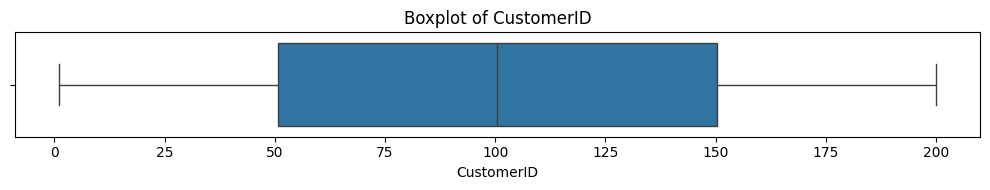

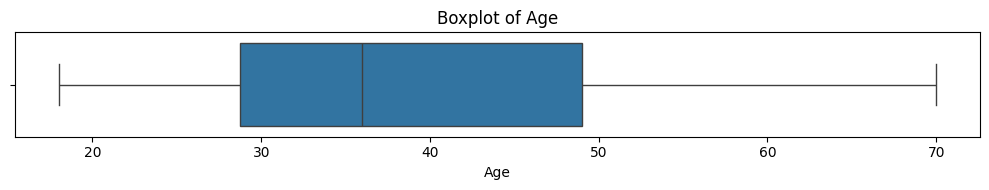

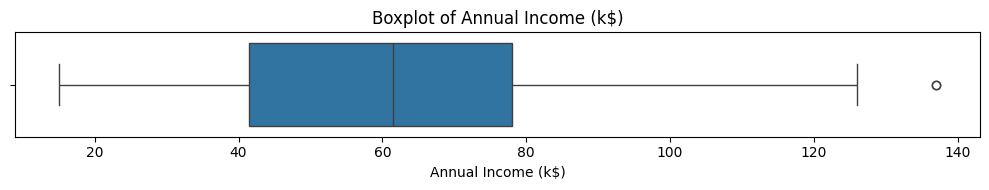

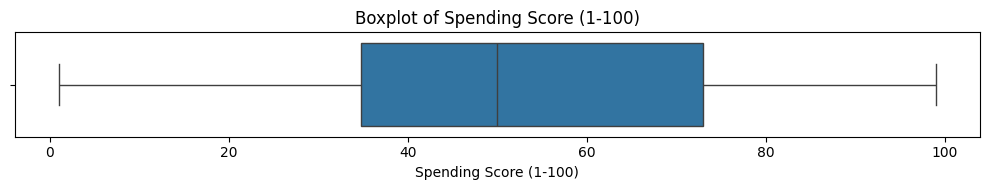

In [108]:
# Creating Boxplot for the continous columns in the dataset

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Unnamed: 32': # Exclude the column with all NaN values
        plt.figure(figsize=(10, 2)) # Adjust figure size as needed
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [109]:
#Outliers removal using Z score

from scipy import stats
X = df.select_dtypes(include=['float64', 'int64'])
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
X_filtered = X[filtered_entries]
print(f"Original number of samples: {len(X)}")
print(f"Number of samples after outlier removal (Z-score < 2): {len(X_filtered)}")

Original number of samples: 200
Number of samples after outlier removal (Z-score < 2): 182


In [110]:
# Scale the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_filtered)

In [111]:
# Reduce to 2D using PCA for visualization

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

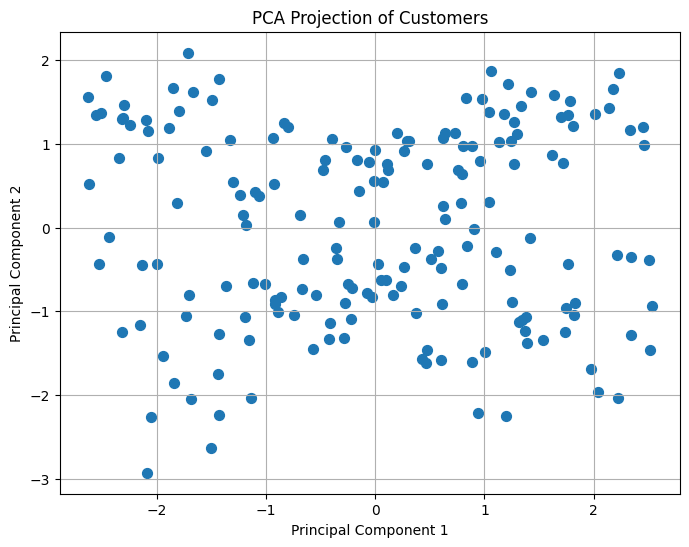

In [112]:
# Scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50)
plt.title("PCA Projection of Customers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [113]:
from sklearn.cluster import KMeans

# starting with an arbitrary K (assuming , 5)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Create a new DataFrame from X_filtered and assign the cluster labels

df_clustered = X_filtered.copy()
df_clustered['Cluster'] = kmeans.labels_
print(df_clustered_opt.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        3
1           2   21                  15                      81        3
2           3   20                  16                       6        3
3           4   23                  16                      77        3
4           5   31                  17                      40        3


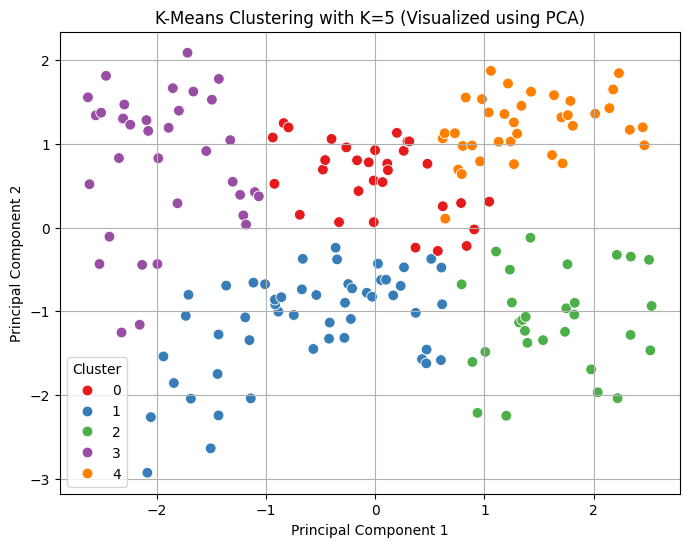

In [114]:
# Visualize the clusters using PCA-reduced data

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans.labels_, palette='Set1', s=60)
plt.title("K-Means Clustering with K=5 (Visualized using PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [115]:
# Sum of squared distances to closest cluster center

inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)


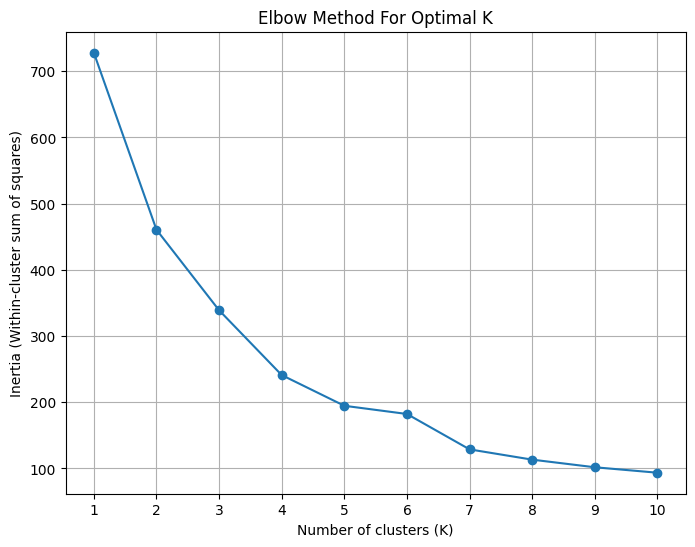

In [116]:
# Elbow curve

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [117]:
# Refit KMeans with optimal K (e.g., 5)

optimal_k = 5
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init
kmeans_opt.fit(scaled_data)

# Create a new DataFrame from X_filtered and assign the cluster labels

df_clustered_opt = X_filtered.copy()
df_clustered_opt['Cluster'] = kmeans_opt.labels_

print(df_clustered_opt.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        3
1           2   21                  15                      81        3
2           3   20                  16                       6        3
3           4   23                  16                      77        3
4           5   31                  17                      40        3


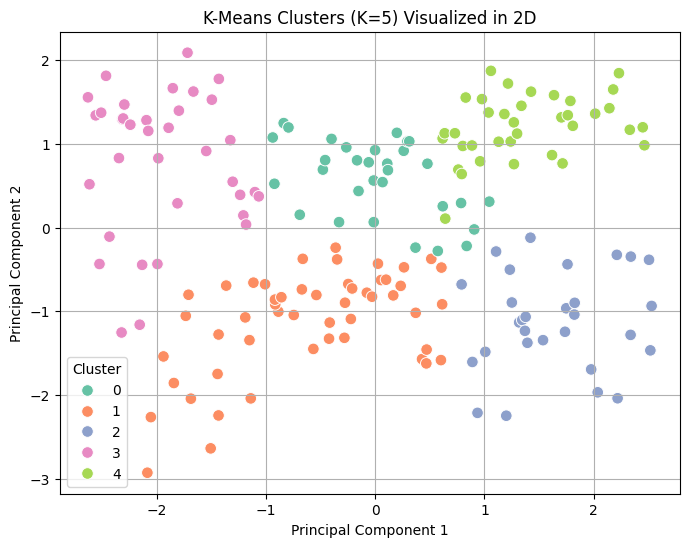

In [118]:
# Visualize in PCA 2D space

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1],
                hue=kmeans_opt.labels_, palette='Set2', s=70)
plt.title(f"K-Means Clusters (K={optimal_k}) Visualized in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [119]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
score = silhouette_score(scaled_data, kmeans_opt.labels_)
print(f"Silhouette Score for K={optimal_k}: {score:.4f}")


Silhouette Score for K=5: 0.4146
